# Scipy Stats
This notebook brings a closer look at the `scipy.stats` module.
The Scientific Python is a package with many distributions, stats, hypothesis tests and resampling options.
It has many tools for a good data exploration.

In [133]:
import scipy.stats as scs
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

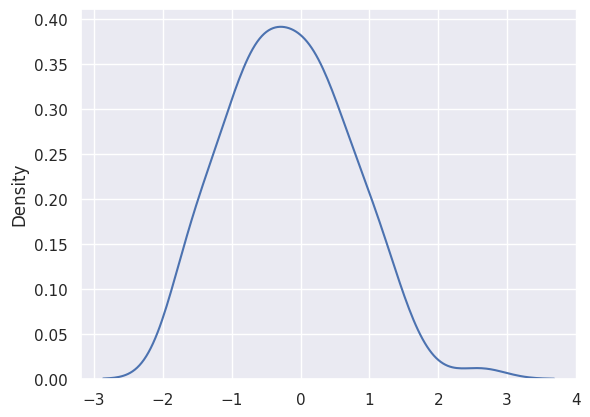

In [249]:
# normal distribution
normal = scs.norm.rvs(loc=0, scale=1, size=100)

#plot
sns.kdeplot(normal);

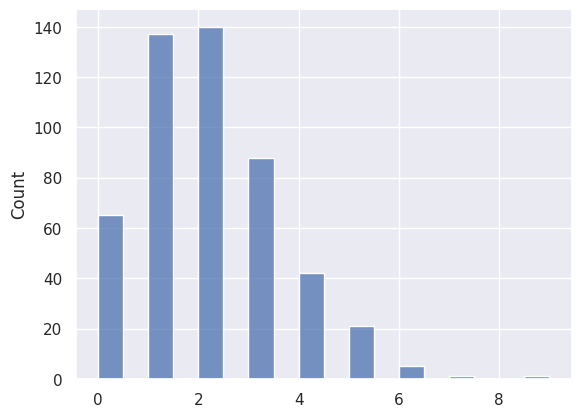

In [250]:
# poison distribution
pois = scs.poisson.rvs(mu=2, size=500)

#plot
sns.histplot(pois);

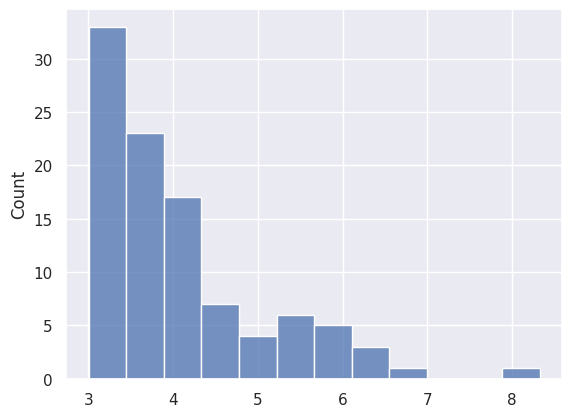

In [251]:
# exponential distribution
expo = scs.expon.rvs(loc=3, scale=1, size=100, random_state=12)

# plot
sns.histplot(expo);

<Axes: ylabel='Count'>

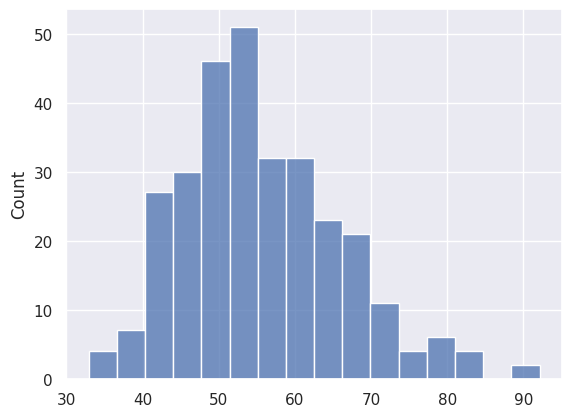

In [252]:
# Chi Square distribution
chi = scs.chi2.rvs(df=55, size=300)

sns.histplot(chi)

#### PDF and CDF

In [255]:
scs.norm.cdf(normal)
scs.norm.pdf(normal)

array([0.13379461, 0.07050448, 0.85509326, 0.52364504, 0.60638559,
       0.18646889, 0.47575034, 0.8535809 , 0.405746  , 0.85344599,
       0.22023952, 0.31759961, 0.25459467, 0.1049659 , 0.13321116,
       0.83553847, 0.59508954, 0.31867779, 0.14618768, 0.80369867,
       0.23647582, 0.59460138, 0.17100578, 0.53231884, 0.08687811,
       0.40199624, 0.4327604 , 0.77256968, 0.78806929, 0.49672133,
       0.31288857, 0.62424945, 0.82072785, 0.7569332 , 0.50725181,
       0.86838796, 0.6583794 , 0.70889552, 0.38909127, 0.06727457,
       0.0652079 , 0.63033267, 0.71382259, 0.04381533, 0.25862148,
       0.28692676, 0.4518547 , 0.86855217, 0.05091444, 0.90607071,
       0.90216091, 0.17333294, 0.7714519 , 0.61004276, 0.25655132,
       0.61111559, 0.04748721, 0.05418482, 0.17511053, 0.11222201,
       0.03535014, 0.58199235, 0.11224684, 0.92357004, 0.19114268,
       0.26553725, 0.49304663, 0.51352846, 0.28865892, 0.56813798,
       0.29647936, 0.68243218, 0.39420382, 0.72795531, 0.17170

In [256]:
#distribution
#d = [1,2,3,4,5,6,7,8,9,12,1,1,15,2,16,3,16,1,17]

d = scs.norm.rvs(loc=0, scale=1, size=100, random_state=12)

scs.describe(d)

DescribeResult(nobs=100, minmax=(-3.14741652154398, 2.8718193949889166), mean=-0.14430749763868853, variance=1.1050630588641528, skewness=0.05470178363174691, kurtosis=0.27834782892208176)

In [265]:
stats_ = scs.describe(d)
print(f'Mean: {stats_.mean}')
print(f'Variance: {stats_.variance}')
print(f'Skewness: {stats_.skewness}')
print(f'Kurtosis: {stats_.kurtosis}')

Mean: -0.14430749763868853
Variance: 1.1050630588641528
Skewness: 0.05470178363174691
Kurtosis: 0.27834782892208176


In [8]:
scs.tmean(d, (1,3))

1.5427740357627466

In [9]:
d = [1,1,2,7,3,4,5,6]
scs.rankdata(d)

array([1.5, 1.5, 3. , 8. , 4. , 5. , 6. , 7. ])

In [10]:
d = [1,2,2,2]

scs.bayes_mvs(d, 0.05)

(Mean(statistic=1.75, minmax=(1.7329781193311682, 1.7670218806688318)),
 Variance(statistic=0.75, minmax=(0.2998067979122184, 0.33550321034156133)),
 Std_dev(statistic=0.6909882989426709, minmax=(0.5475461605309806, 0.5792263895417415)))

In [11]:
scs.find_repeats([1,2,3,3,4,5,6])

RepeatedResults(values=array([3.]), counts=array([2]))

### Hipothesis test one sample

In [12]:
# Company salary
company = [120, 115, 125, 138]

# Market average
mkt = 130

# Hypothesis test
scs.ttest_1samp(company, popmean=mkt, alternative='greater')

TtestResult(statistic=-1.1130623746355601, pvalue=0.8265797321607529, df=3)

Let's say you have a coffee shop and you assess that 8% of 150 customers are buying a new drink, so 12 customers. Can we test if, in the same environment (given the same probability of success = 8%), if we could see 20 customers buying the new drink?
Significance level of 5%

In [24]:
# Binomial Test
successes = 15
trials = 150
p = 0.08

scs.binomtest(successes, trials, p, alternative='greater')

BinomTestResult(k=15, n=150, alternative='greater', statistic=0.1, pvalue=0.2202560199059187)

In [26]:
# Normal Test
d_norm = scs.norm.rvs(loc=0, scale=1, size=100, random_state=12)
d_expon = scs.expon.rvs(loc=3, scale=1, size=100, random_state=12)

print("Normal:",scs.normaltest(d_norm))
print("EXponential:", scs.normaltest(d_expon))

Normal: NormaltestResult(statistic=0.8190182789113444, pvalue=0.6639760898237252)
EXponential: NormaltestResult(statistic=33.69547265654829, pvalue=4.820821820360837e-08)


In [266]:
# Two samples test: Comparison of means

# Sample 1
samp1 = scs.norm.rvs(loc=2, scale=5, size=100, random_state=12)

# Sample 2
samp2 = scs.norm.rvs(loc=3, scale=3, size=100, random_state=12)

# Hypothesis test
scs.ttest_ind(samp1, samp2, equal_var=False)

TtestResult(statistic=-2.1022782237188657, pvalue=0.03707419180231478, df=162.10198300283284)

In [267]:
# Levene's test for equal variance test
scs.levene(samp1, samp2)

LeveneResult(statistic=18.17151743553794, pvalue=3.1222803039659347e-05)

In [272]:
# Comparing variations coefficients
scs.variation(samp1), scs.variation(samp2)

(4.090657648137783, 1.2223438764152452)

### Resampling

In [103]:
# Bootstrap
dist = scs.norm.rvs(loc=10, scale=1, size=300, random_state=12)
dist = (dist,)
scs.bootstrap(dist, statistic=np.mean, confidence_level=0.95)

BootstrapResult(confidence_interval=ConfidenceInterval(low=9.717562154498236, high=9.955179688263437), bootstrap_distribution=array([9.84762955, 9.87137856, 9.82459403, ..., 9.89246925, 9.81027895,
       9.83134846]), standard_error=0.06040179036433725)

In [98]:
# Monte Carlo
# generate a sample from a normally distribution
x = scs.norm.rvs(loc=70, scale=10, size=10).astype(np.int32)
rvs = lambda size: scs.norm.rvs(loc=65, scale=10, size=size).astype(np.int32)

scs.monte_carlo_test(x, rvs, np.mean, n_resamples=10000, alternative='greater')

MonteCarloTestResult(statistic=68.3, pvalue=0.11678832116788321, null_distribution=array([60.9, 63.1, 65.1, ..., 63.2, 61.9, 67.3]))

In [124]:
# Samples
x = scs.norm.rvs(loc=70, scale=10, size=10).astype(np.int32)
y = scs.norm.rvs(loc=65, scale=10, size=10).astype(np.int32)

# T Test
scs.ttest_ind(x, y, equal_var=True)

TtestResult(statistic=1.688107424484386, pvalue=0.1086404147869201, df=18.0)

### Transformations

In [186]:
# Box Cox Power Transformations

# sample
exp_ = scs.exponpow.rvs(b=10, loc=3, scale=1, size=300, random_state=12)

# Box Cox
boxcox_transformed = scs.boxcox(exp_)

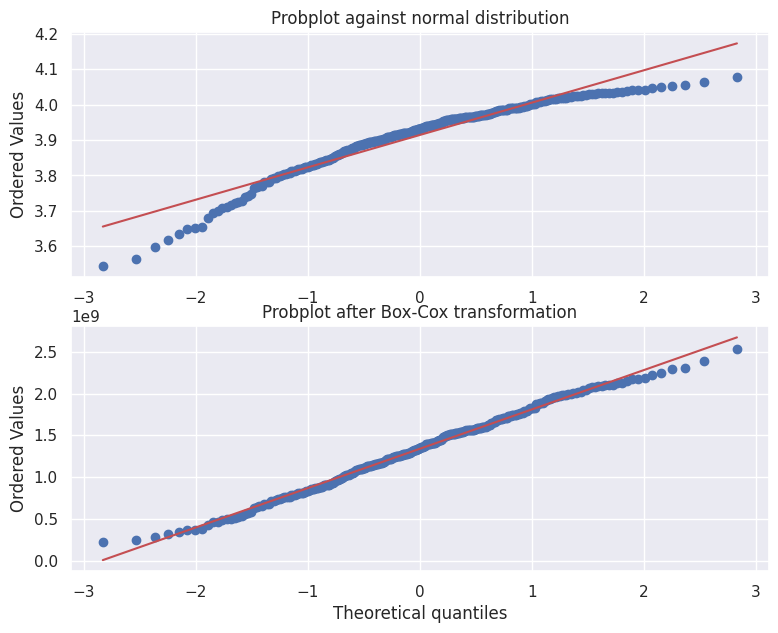

In [187]:
# Creating Figure
fig = plt.figure(figsize=(9, 7))

# Subplot 1
ax1 = fig.add_subplot(211)
scs.probplot(exp_, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

# Subplot 2
ax2 = fig.add_subplot(212)
scs.probplot(boxcox_transformed[0], plot=ax2);
ax2.set_title('Probplot after Box-Cox transformation');

In [180]:
# Calculating optimal lambda with Scipy
scs.boxcox_normmax(exp_)

18.439175827412804

In [242]:
# Distribution
dist = [12,23,13,34,55,16,1]

# Calculating Z scores = "point_estimate - mean/std"
Z = scs.zscore(dist)

Z

array([-0.60825887,  0.06082589, -0.54743299,  0.72991065,  2.00725429,
       -0.36495532, -1.27734364])

In [248]:
# Use the cumulative distribution function (CDF) to find the probability
probability = scs.norm.cdf(Z)

for i,n in zip(probability,dist):
  if i < 0:
    print(f"Probability of a number more extreme than {n}:", i)
  else:
    print(f"Probability of a number more extreme than {n}:", 1-i)

Probability of a number more extreme than 12: 0.7284921038135481
Probability of a number more extreme than 23: 0.4757489366442327
Probability of a number more extreme than 13: 0.7079593510974136
Probability of a number more extreme than 34: 0.23272240120113985
Probability of a number more extreme than 55: 0.02236129701530054
Probability of a number more extreme than 16: 0.6424276224116628
Probability of a number more extreme than 1: 0.8992595228449655
